# 1. Time Series Analysis 
## Abdullah Karasan

Techniques that we apply varies depending on the dataset at our disposal. The analysis of data with different time points leads to unique treatment in statistical modeling. In finance, having time dimension in the data is not a rare rather very common issues and these type of data should be treated with cautious.

The statistical modeling approach by which we try to address the statistical issues considering the time dimension is referred to as `time series analysis`. For instance, stock prices, inflation, economic growth, dividend payment, interest rates, weather data are just a few cases in which data has time dimension.

The primary motivation in time series analysis lies in the correlation in time. More specifically, as the current value is to some degree dependent on its past values. So, the correlation between successive time points can unveil the dependence structure of this time-based relationship.

 We are about the discuss in-depth time series analysis. Get ready and take a deep breath because if you are a financial modeling enthusiast, I bet this will be your reference course.

Suppose that we have random variables denoted as $x_t$, $x_{t-1}$, $x_{t-2}$ where $x_t$ denotes realization of z at time t. If current value of x ($x_t$) depends on the lag values ($x_{t-1}$, $x_{t-2}$ and so on), we are talking about time series modeling.

There are two important concepts about time series modeling: **Stationary** and **Random Walk**

## 1.1. Stationary

The basic assumption in modeling is that $X_i$ should be independent from other realizations. If independence assumption does not hold, the result of the model cannot be reliable any more. Stationary is a way to model the dependent structure that we have in time-dependent data. For instance, current stock price is somewhat related to the previous prices of the stock.

Stationary can be divided into two as:
   * Strictly Stationary
   * Weakly Stationary

`Strictly stationary` time series occurs when {$x_{t1}$, $x_{t2}$,...,$x_{tk}$} is identical to the shifted set of {$x_{t1+h}$, $x_{t2+h}$,...,$x_{tk+h}$}

`Weakly stationary` time series is satisfied when:
    * Mean of a series is constant over time
    * The variance of the series should not a be a function of time. In other words, covariance function, \gamma(s,t) depends on |s-t| only.

In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

$$\Delta x=x_t-x_{t-1}$$

To show how it take the first difference in Python, I use the Apple stock price gathered from yahoo-finance. By doing that, we are able to observe the changes between stationary and non-stationary data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [8]:
stock= 'BLK'
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2021,1,1)
blk_close = yf.download(stock, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
blk_close

Date
2004-12-31     77.260002
2005-01-03     75.779999
2005-01-04     75.550003
2005-01-05     74.849998
2005-01-06     80.000000
                 ...    
2020-12-24    707.179993
2020-12-28    710.179993
2020-12-29    706.280029
2020-12-30    708.940002
2020-12-31    721.539978
Name: Close, Length: 4029, dtype: float64

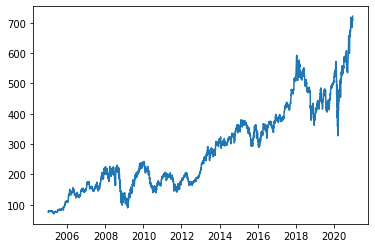

In [10]:
plt.plot(blk_close);

As we can observe, there is a real trend in Apple's stock price. Specifically, in 2010, it has a value under $\$50$ and, towards the beginning of 2020, it hit $250. Thus, it is not stationary.

Another way of detecting the non-stationarity is to apply `Autocorrelation Function`. Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The more height of the bar in the acf plot, the more dependence a series has.

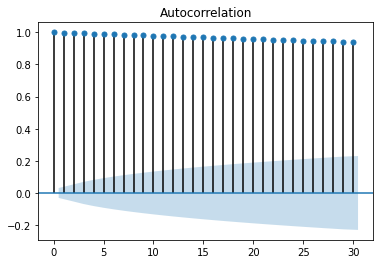

In [11]:
sm.graphics.tsa.plot_acf(blk_close, lags=30)
plt.show()

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. 

Let's see what happens when the first difference of the stock price is taken. `.diff()` function takes the first difference in Python.

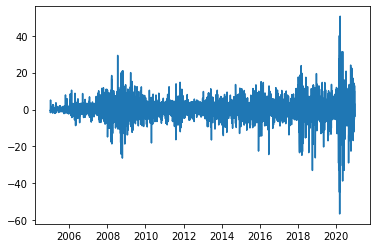

In [13]:
plt.plot(blk_close.diff())
plt.show()


Another method for detecting stationarity is the statistical test and one of the most common one is `augmented dickey fuller` test.

$H_0 :\theta = 0$

$H_1 :\theta < 0$

In [15]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(blk_close)[:2]
print('The test statistic and p-value of ADF are {}'.format(stat_test))

The test statistic and p-value of ADF are (0.39101242213086845, 0.9811557098742463)


After taking the first difference, it is quite obvious that the series fluctuates around its mean and it is referred to as weakly stationary.

In [17]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(blk_close.diff().dropna())[:2]
print('The test statistic and p-value of ADF are {}'.format(stat_test))

The test statistic and p-value of ADF are (-15.068911803291638, 8.782856862998788e-28)


## 1.2. Random Walk

Random walk is basically a process in which series fluctuates around its mean. Differently, a random walk is a process by which randomly-moving objects wander away from where they started. If we have zero intercept term, the simple random walk model is what we have:

$$x_t=x_{t-1}+e_t$$

So, the path of $x_t$ is determined by $x_{t-1}$ and $e_t$ which is completely random.

Let's generate random number from standard normal distribution via `.randn()`. Standard normal distribution is a special version of normal distribution with a mean of 0 and a standard deviation of 1. Let's generate 100 normally distributed data:

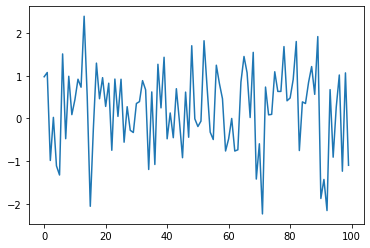

In [18]:
random_walk = np.random.randn(100)
plt.plot(random_walk);

## 1.3. Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

    * Moving Average
    * Autoregressive Model
    * Autoregressive Moving Average
    * Autoregressive Integrated Moving Average
    * Seasonal Autoregressive Integrated Moving Average


### 1.3.1. Moving Average Model

`Moving average`model tries to capture the time series dynamics simply by error terms. Let $e_t$ is a normally distributed term, meaning that it is identically and independently distributed (iid). So, unlike AR, MA is alway stationary.

MA(1) can be take the following form:

$$ X_{t} = \alpha + \beta \epsilon_{t-1} + \epsilon_{t} $$



Similarly, the $q_{th}$ order moving average model can be shown as:

$$ X_{t} = \alpha + \beta_1 \epsilon_{t-1} +\cdots+\beta_q \epsilon_{t-q} +\epsilon_{t} $$

Modeling a time series with MA in Python is not very different from modeling AR. The only difference is the location of the order (lag) parameter. The first parameter of order represent the number of lag values of AR whereas the second input of order in ARMA defines the number of lag values in modeling MA. A quick note: As the MA works with the windows, less order number might result in bad prediction.

Let's decide the best-fitting MA model. But before moving forward, I need to calculate the first difference and drop the missing values to not to get `exog contains inf or nans` error.

In [19]:
diff_blk_close = blk_close.diff().dropna()

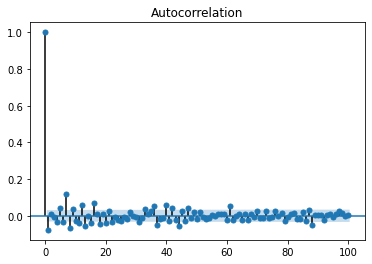

In [30]:
sm.graphics.tsa.plot_acf(diff_blk_close, lags=100)
plt.show()

ACF plot for `BlackRock` stock price indicates a pattern typical for situations where an MA(8) model may be useful. There are three statistically significant “spikes” at lags 1,7 and 8 followed by non-significant values for other lags.

In [22]:
moving_average_blk = diff_blk_close.rolling(window=8).mean()

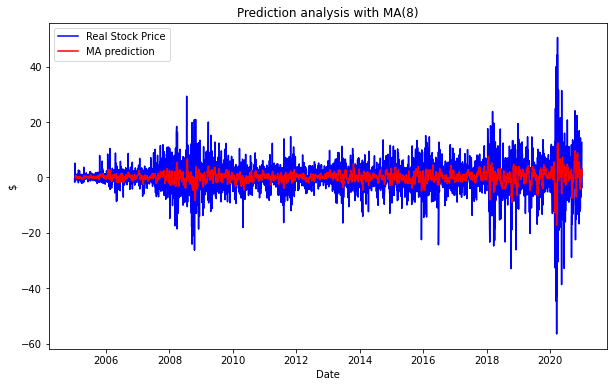

In [24]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close.loc[start:end].index, diff_blk_close.loc[start:end],
        label='Real Stock Price', c='b')
plt.plot(moving_average_blk.loc[start:end].index, moving_average_blk.loc[start:end],
        label='MA prediction', c='r')
plt.title('Prediction analysis with MA(8)')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [ ]:
MA(200)
et-1...et-200

In [25]:
moving_average_blk1 = diff_blk_close.rolling(window=1).mean()

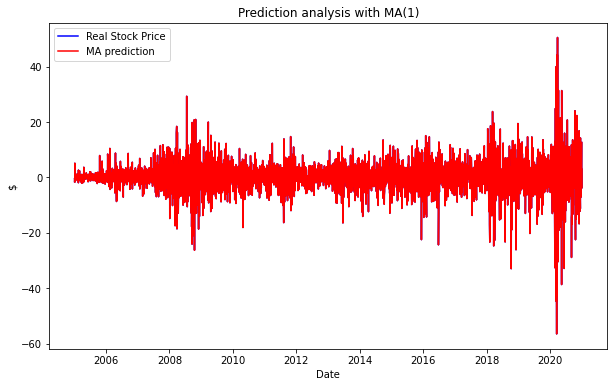

In [26]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close.loc[start:end].index, diff_blk_close.loc[start:end],
        label='Real Stock Price', c='b')
plt.plot(moving_average_blk1.loc[start:end].index, moving_average_blk1.loc[start:end],
        label='MA prediction', c='r')
plt.title('Prediction analysis with MA(1)')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [27]:
moving_average_blk22 = diff_blk_close.rolling(window=22).mean()

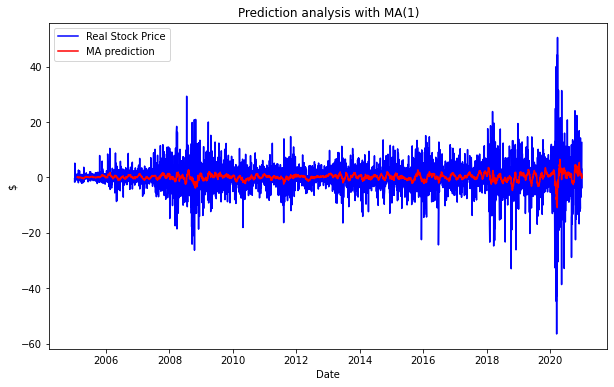

In [28]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close.loc[start:end].index, diff_blk_close.loc[start:end],
        label='Real Stock Price', c='b')
plt.plot(moving_average_blk22.loc[start:end].index, moving_average_blk22.loc[start:end],
        label='MA prediction', c='r')
plt.title('Prediction analysis with MA(1)')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()